# ASTR - 19 Final: Hubble Ultrea Deep Field
We will involve developing programs to analyze and assess the statistical significance of events in scientific data relative to a model.

In [242]:
import numpy as np
import sep

In [243]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams ['figure.figsize'] = [10., 8.]

In [244]:
# read the image into the standard 2-d numpy array
with fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits") as hdul:
    data = hdul[0].data

data = data.byteswap().newbyteorder()

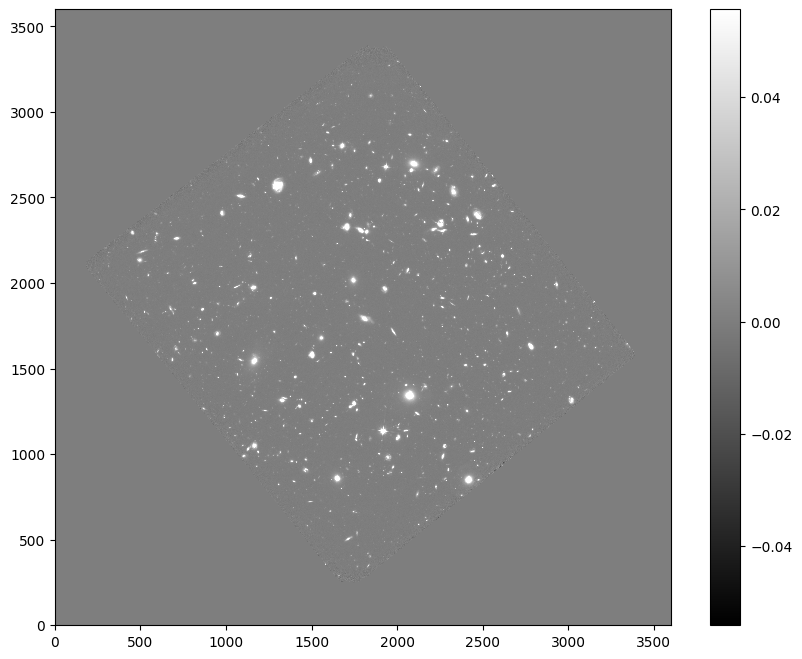

In [245]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

# Begin background subtraction 

In [246]:
#measure a spatially varying background on the image
bkg = sep.Background(data)

In [247]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [248]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()

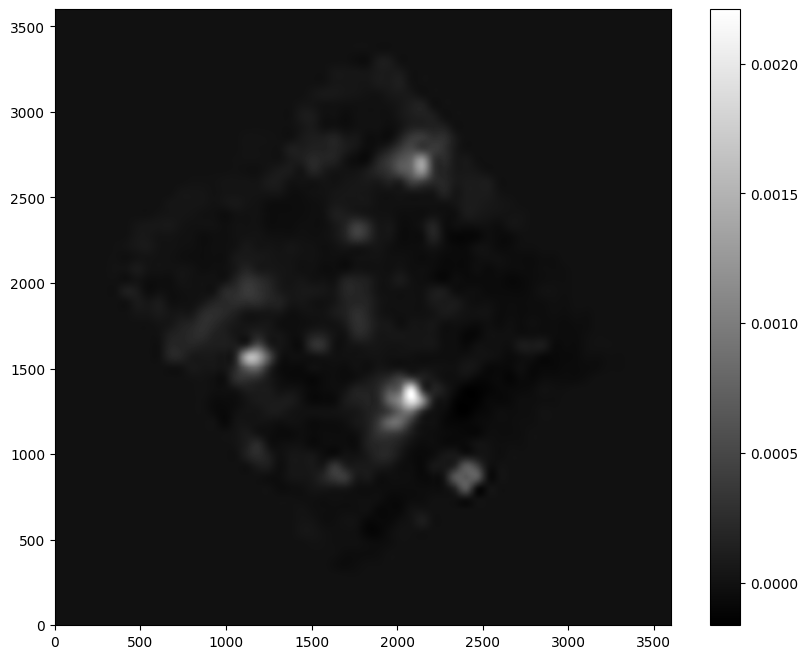

In [249]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('background_read.png', bbox_inches='tight', facecolor = 'mediumpurple')

In [250]:
#evaluate the background noise as a 2-d array, same as the original image
bkg_rms = bkg.rms()

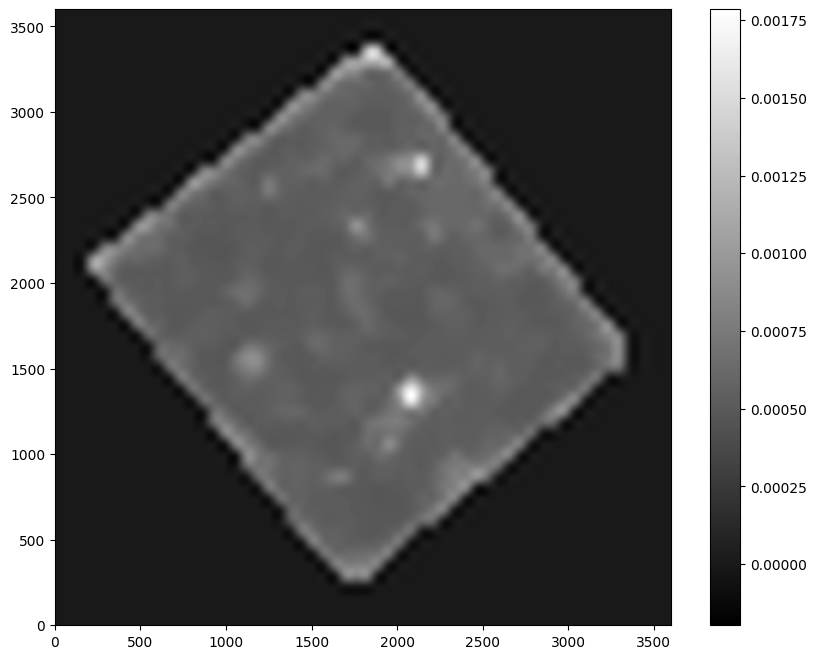

In [251]:
#show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('background_noie_read.png', bbox_inches='tight', facecolor = 'mediumpurple')

In [252]:
# subtract the background
data_sub = data - bkg

# Object Detection

In [253]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [254]:
len(objects)

8640

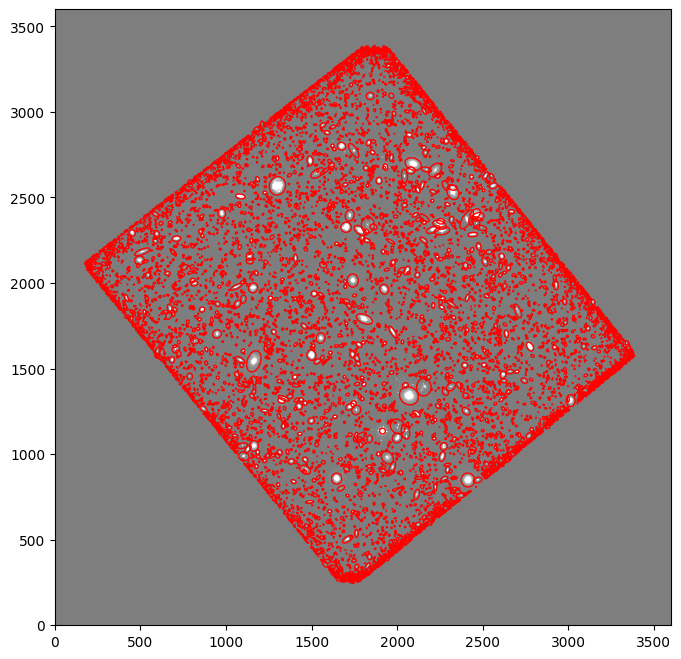

In [255]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipses for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

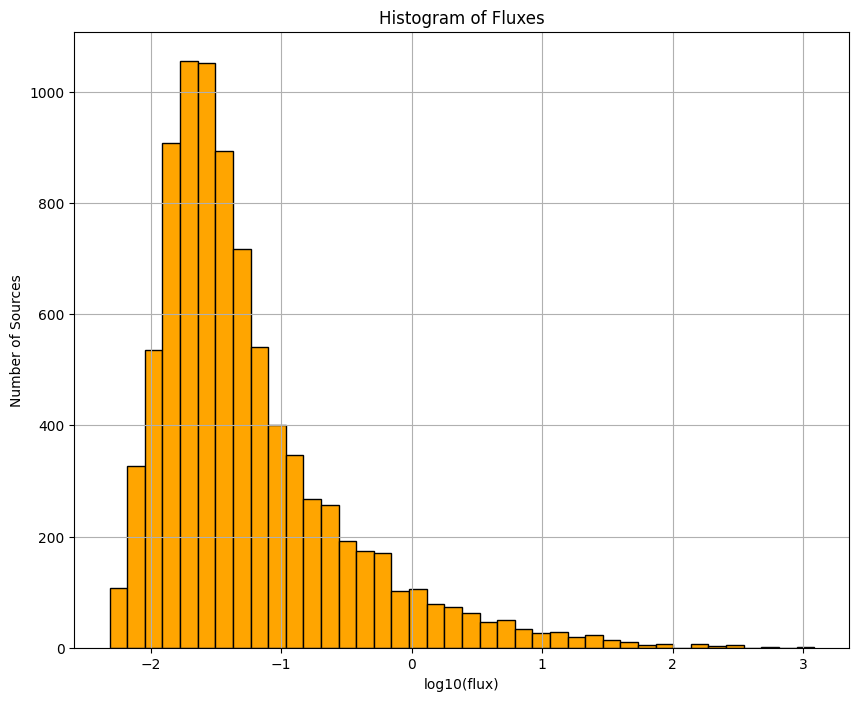

In [256]:
flux_values = objects['flux']

#Take the logarithm of the flux values
log_flux_values = np.log10(flux_values)

#Histogram of the logarithm of flux values
plt.hist(log_flux_values, bins=40, color='orange', edgecolor='black')
plt.xlabel('log10(flux)')
plt.ylabel('Number of Sources')
plt.title('Histogram of Fluxes')
plt.grid(True)
plt.show()

In [216]:
mean = np.mean(fluxes)
print('The mean of the object is:', mean)

The mean of the object is: 1.1726778032851009


In [257]:
median = np.median(fluxes)
print('The median of the object is:', median)

The median of the object is: 0.034888697788119316


In [258]:
std = np.std(fluxes)
print('The std of the object is:', std)

The std of the object is: 17.5474209122515


In [259]:
num1 = fluxes/mean
print(num1)

[0.03109006 0.04107793 0.01236895 ... 0.10480575 0.02444212 0.01247925]


In [260]:
largest_outlier_distributed = num1/std
print(largest_outlier_distributed)

[0.00177177 0.00234097 0.00070489 ... 0.00597272 0.00139292 0.00071117]


# Make a 3-color false image of the UDF using RGB 

In [261]:
#define file names
fdata_f105w = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
fdata_f125w = "hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
fdata_f160w = "hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"

#read in the data
hdu_1 = fits.open(fdata_f105w)
hdu_2 = fits.open(fdata_f125w)
hdu_3 = fits.open(fdata_f160w)

#get the image data
data_1 = hdu_1[0].data
data_2 = hdu_2[0].data
data_3 = hdu_3[0].data

# Have a look at the data
The data arrays are images.

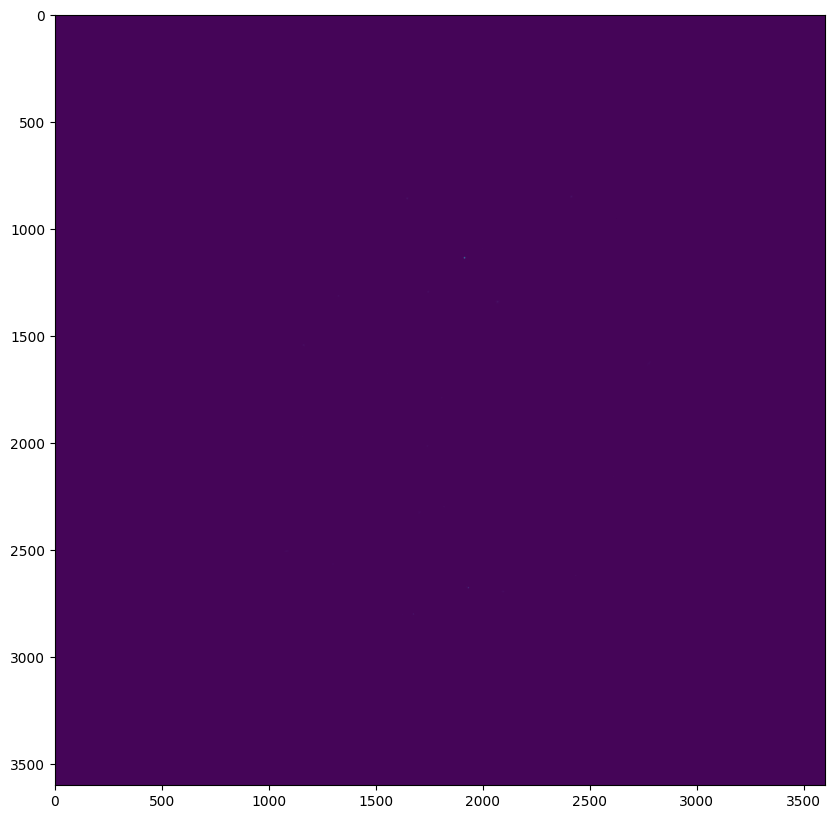

In [262]:
##First, do only linear scaling
f = plt.figure(figsize=(10,10))
plt.imshow(data_1)

The data arrays are images, with the pixel values scale linearly with the flux of astronomical sources. Rescale the data to see faint objects.

In [263]:
def rescale_image(data):
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2.
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m * 100)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp, vpmin, vpmax

# Functiont to replot the rescaled data

In [264]:
def fits_quicklook(data,fnx=10, fny=10):
    f = plt.figure(figsize=(fnx, fny))
    pdata_tmp, vpmin, vpmax = rescale_image(data)
    plt.imshow(pdata_tmp, vmin=vpmin, vmax=vpmax)

# Show the image

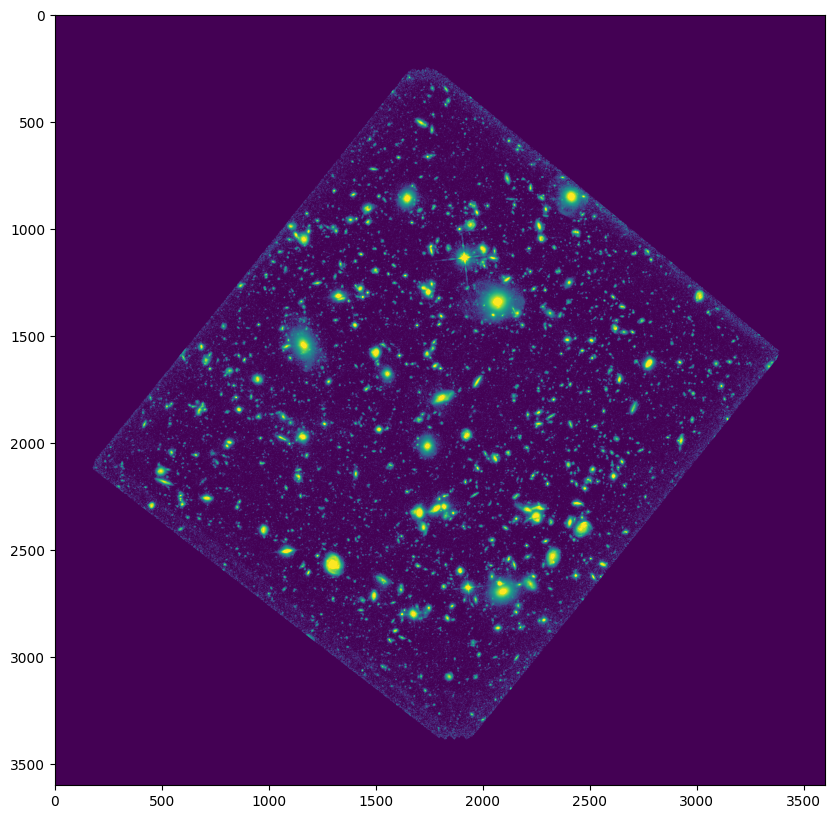

In [265]:
fits_quicklook(data_1)

# Actually making the 3-color image from the data

In [266]:
###Use the rescaled images
data_1_res, d1min, d1max = rescale_image(data_1)
data_2_res, d2min, d2max = rescale_image(data_2)
data_3_res, d3min, d3max = rescale_image(data_3)

Limit the data to be between the min and max values in rescaling

In [267]:
data_1_res[data_1_res<d1min] = d1min
data_1_res[data_1_res>d1max] = d1max
data_2_res[data_2_res<d2min] = d2min
data_2_res[data_2_res>d2max] = d2max
data_3_res[data_3_res<d3min] = d3min
data_3_res[data_3_res>d3max] = d3max

Create an RGB image that is nx x ny x 3 in size, where each image is either R,G,B

In [268]:
rgb = np.zeros((data_1_res.shape[0], data_1_res.shape[1],3))
rgb[:,:,0] = (data_1_res-d1min)/(d1max-d1min)
rgb[:,:,1] = (data_2_res-d2min)/(d2max-d2min)
rgb[:,:,2] = (data_3_res-d3min)/(d3max-d3min)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


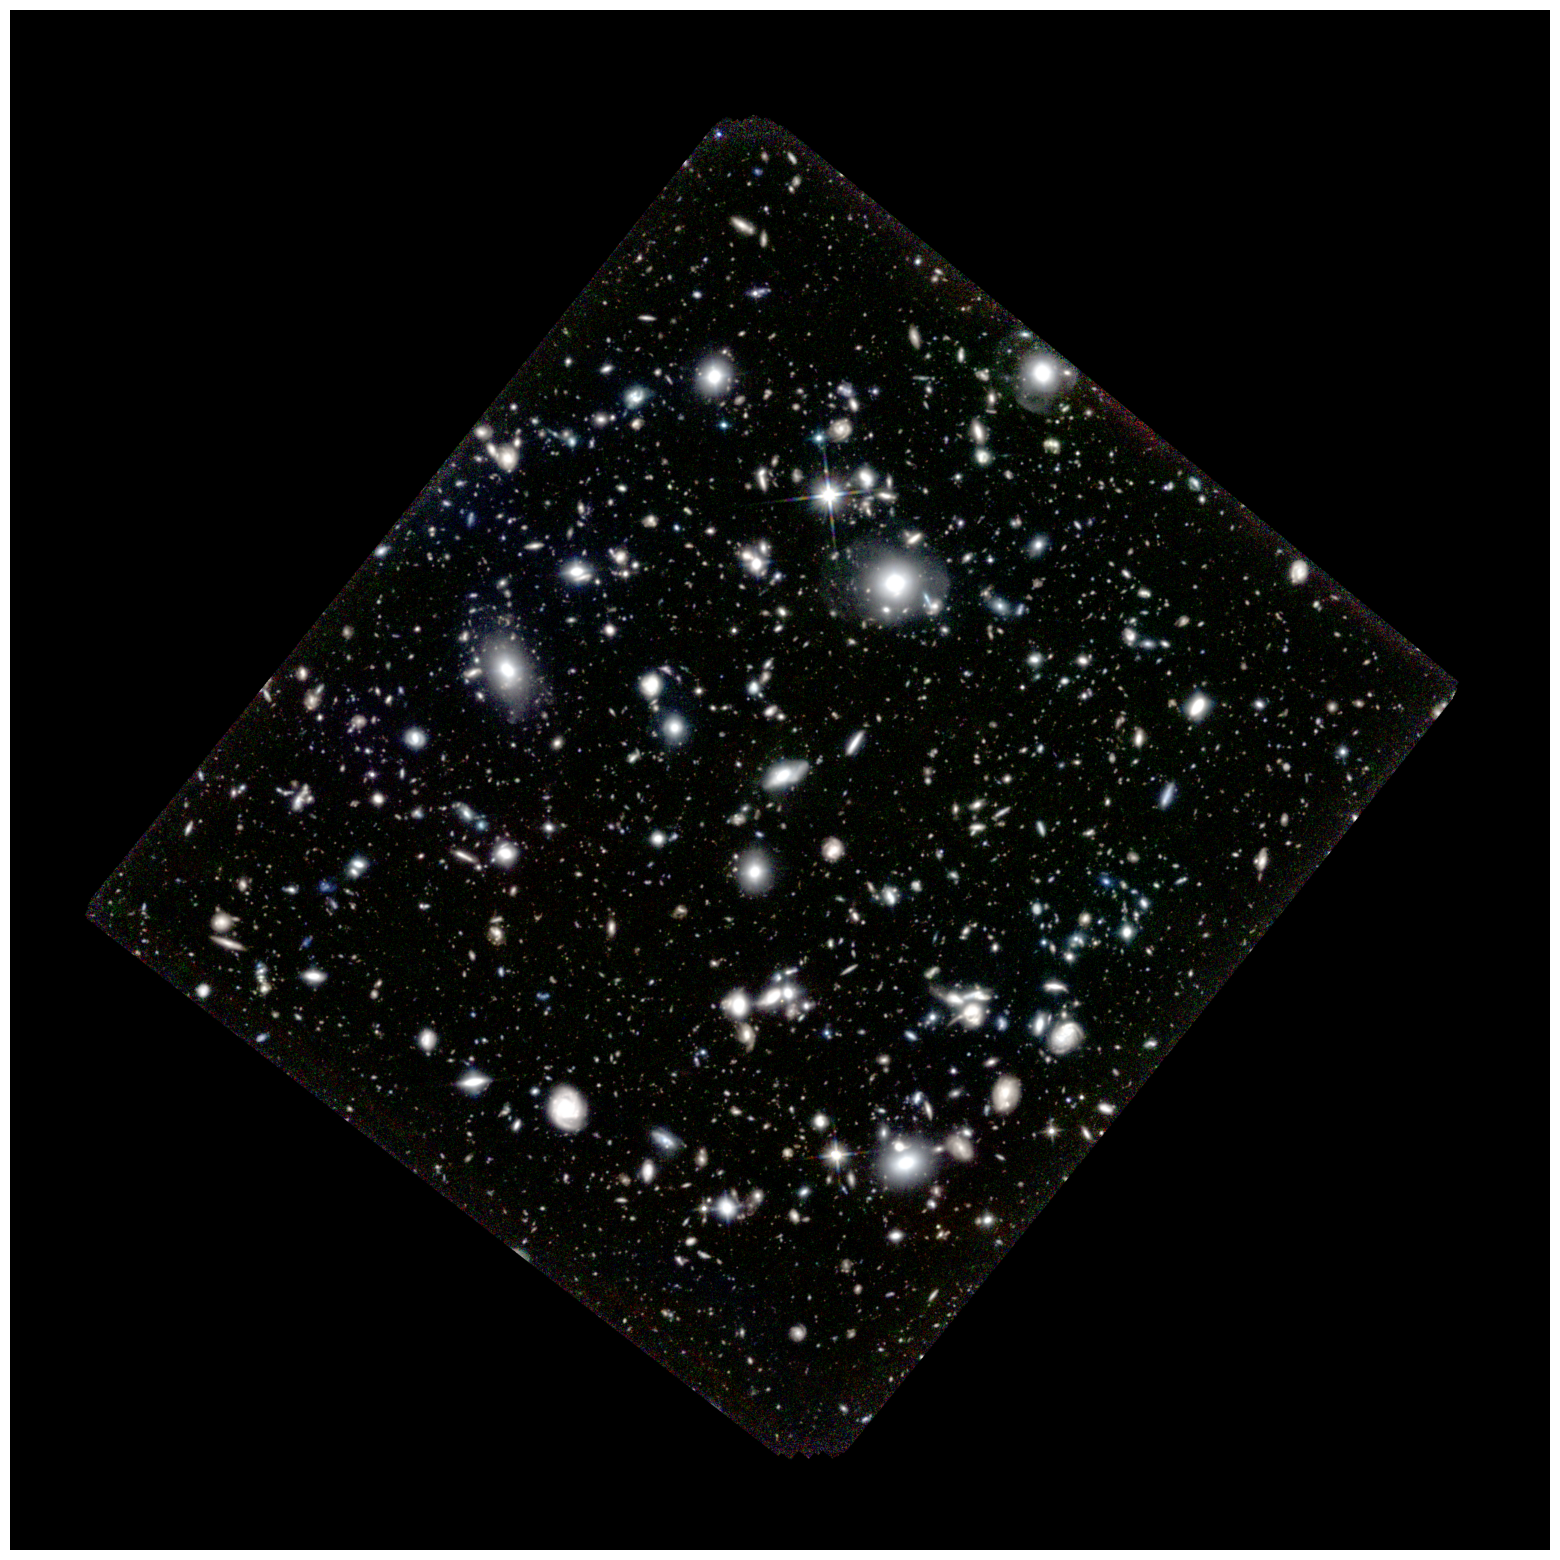

In [269]:
###Plot and save the RGB image
f,ax = plt.subplots(1,1,figsize =(20,20))
ax.axis('off')
ax.imshow(rgb) 
plt.savefig('3_color_rbg_image_UDF.png', bbox_inches = 'tight', pad_inches=0, dpi=600)